In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load the dataset
df = pd.read_csv('lending_data.csv')
print(df.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  


In [3]:
# Check if 'loan_status' is present in the DataFrame
if 'loan_status' in df.columns:
    # Data preprocessing
    # Handle missing values
    median_income = df['borrower_income'].median()
    df['borrower_income'].fillna(median_income, inplace=True)

In [40]:
# Split data into features and target variable
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

# Downsample majority class to balance classes
class_counts = y.value_counts()
min_class_count = class_counts.min()
df_balanced = pd.concat([df[df['loan_status'] == cls].sample(min_class_count, random_state=42) for cls in class_counts.index])
X_balanced = df_balanced.drop(['loan_status'], axis=1)
y_balanced = df_balanced['loan_status']

In [41]:
# Split balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Model training and evaluation
models = {'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
          'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)}

i=0
y_pred = [None] * 2
for name, model in models.items():
    print(f"\nTraining and evaluating {name}:")
    model.fit(X_train_scaled, y_train)
    y_pred[i] = model.predict(X_test_scaled)
    print(y_pred[i])
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred[i])
    print("Accuracy:", accuracy)
    i+=1


Training and evaluating Random Forest Classifier:
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 

In [52]:
# Classification report for Random Forest Classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred[0]))

# Confusion matrix for Random Forest Classifier
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred[0]))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.99      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


Confusion Matrix:
[[495   5]
 [  4 496]]


In [44]:
# Classification report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test, y_pred[1]))

# Confusion matrix for Logistic Regression
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred[1]))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.99      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


Confusion Matrix:
[[496   4]
 [  4 496]]


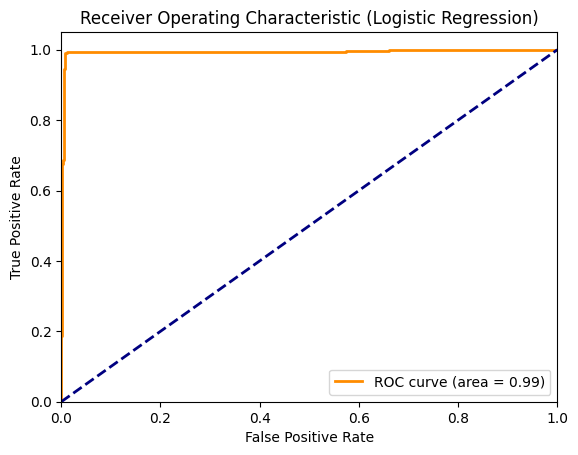

In [45]:
# ROC curve
if hasattr(model, "predict_proba"):
    probas = model.predict_proba(X_test_scaled)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic ({name})')
plt.legend(loc="lower right")
plt.show()

In [46]:
# Feature importance
for name, model in models.items():
    if name == 'Random Forest Classifier':
        feature_importance = model.feature_importances_
        sorted_idx = feature_importance.argsort()
        most_significant_feature_idx = sorted_idx[-1]  # Index of the most significant feature
        most_significant_feature_name = X.columns[most_significant_feature_idx]
        most_significant_feature_importance = feature_importance[most_significant_feature_idx]
        print("\nMost Significant Feature:")
        print(most_significant_feature_name, ":", most_significant_feature_importance)

        print("\nSignificant Features (in descending order of importance):")
        for feature in zip(reversed(X.columns[sorted_idx]), reversed(feature_importance[sorted_idx])):
            print(feature[0], ":", feature[1])



Most Significant Feature:
interest_rate : 0.28619163895404076

Significant Features (in descending order of importance):
interest_rate : 0.28619163895404076
loan_size : 0.19804403434479126
borrower_income : 0.159056666715873
total_debt : 0.14857875581788776
debt_to_income : 0.12918482026998002
num_of_accounts : 0.07894262750242403
derogatory_marks : 1.45639500316574e-06


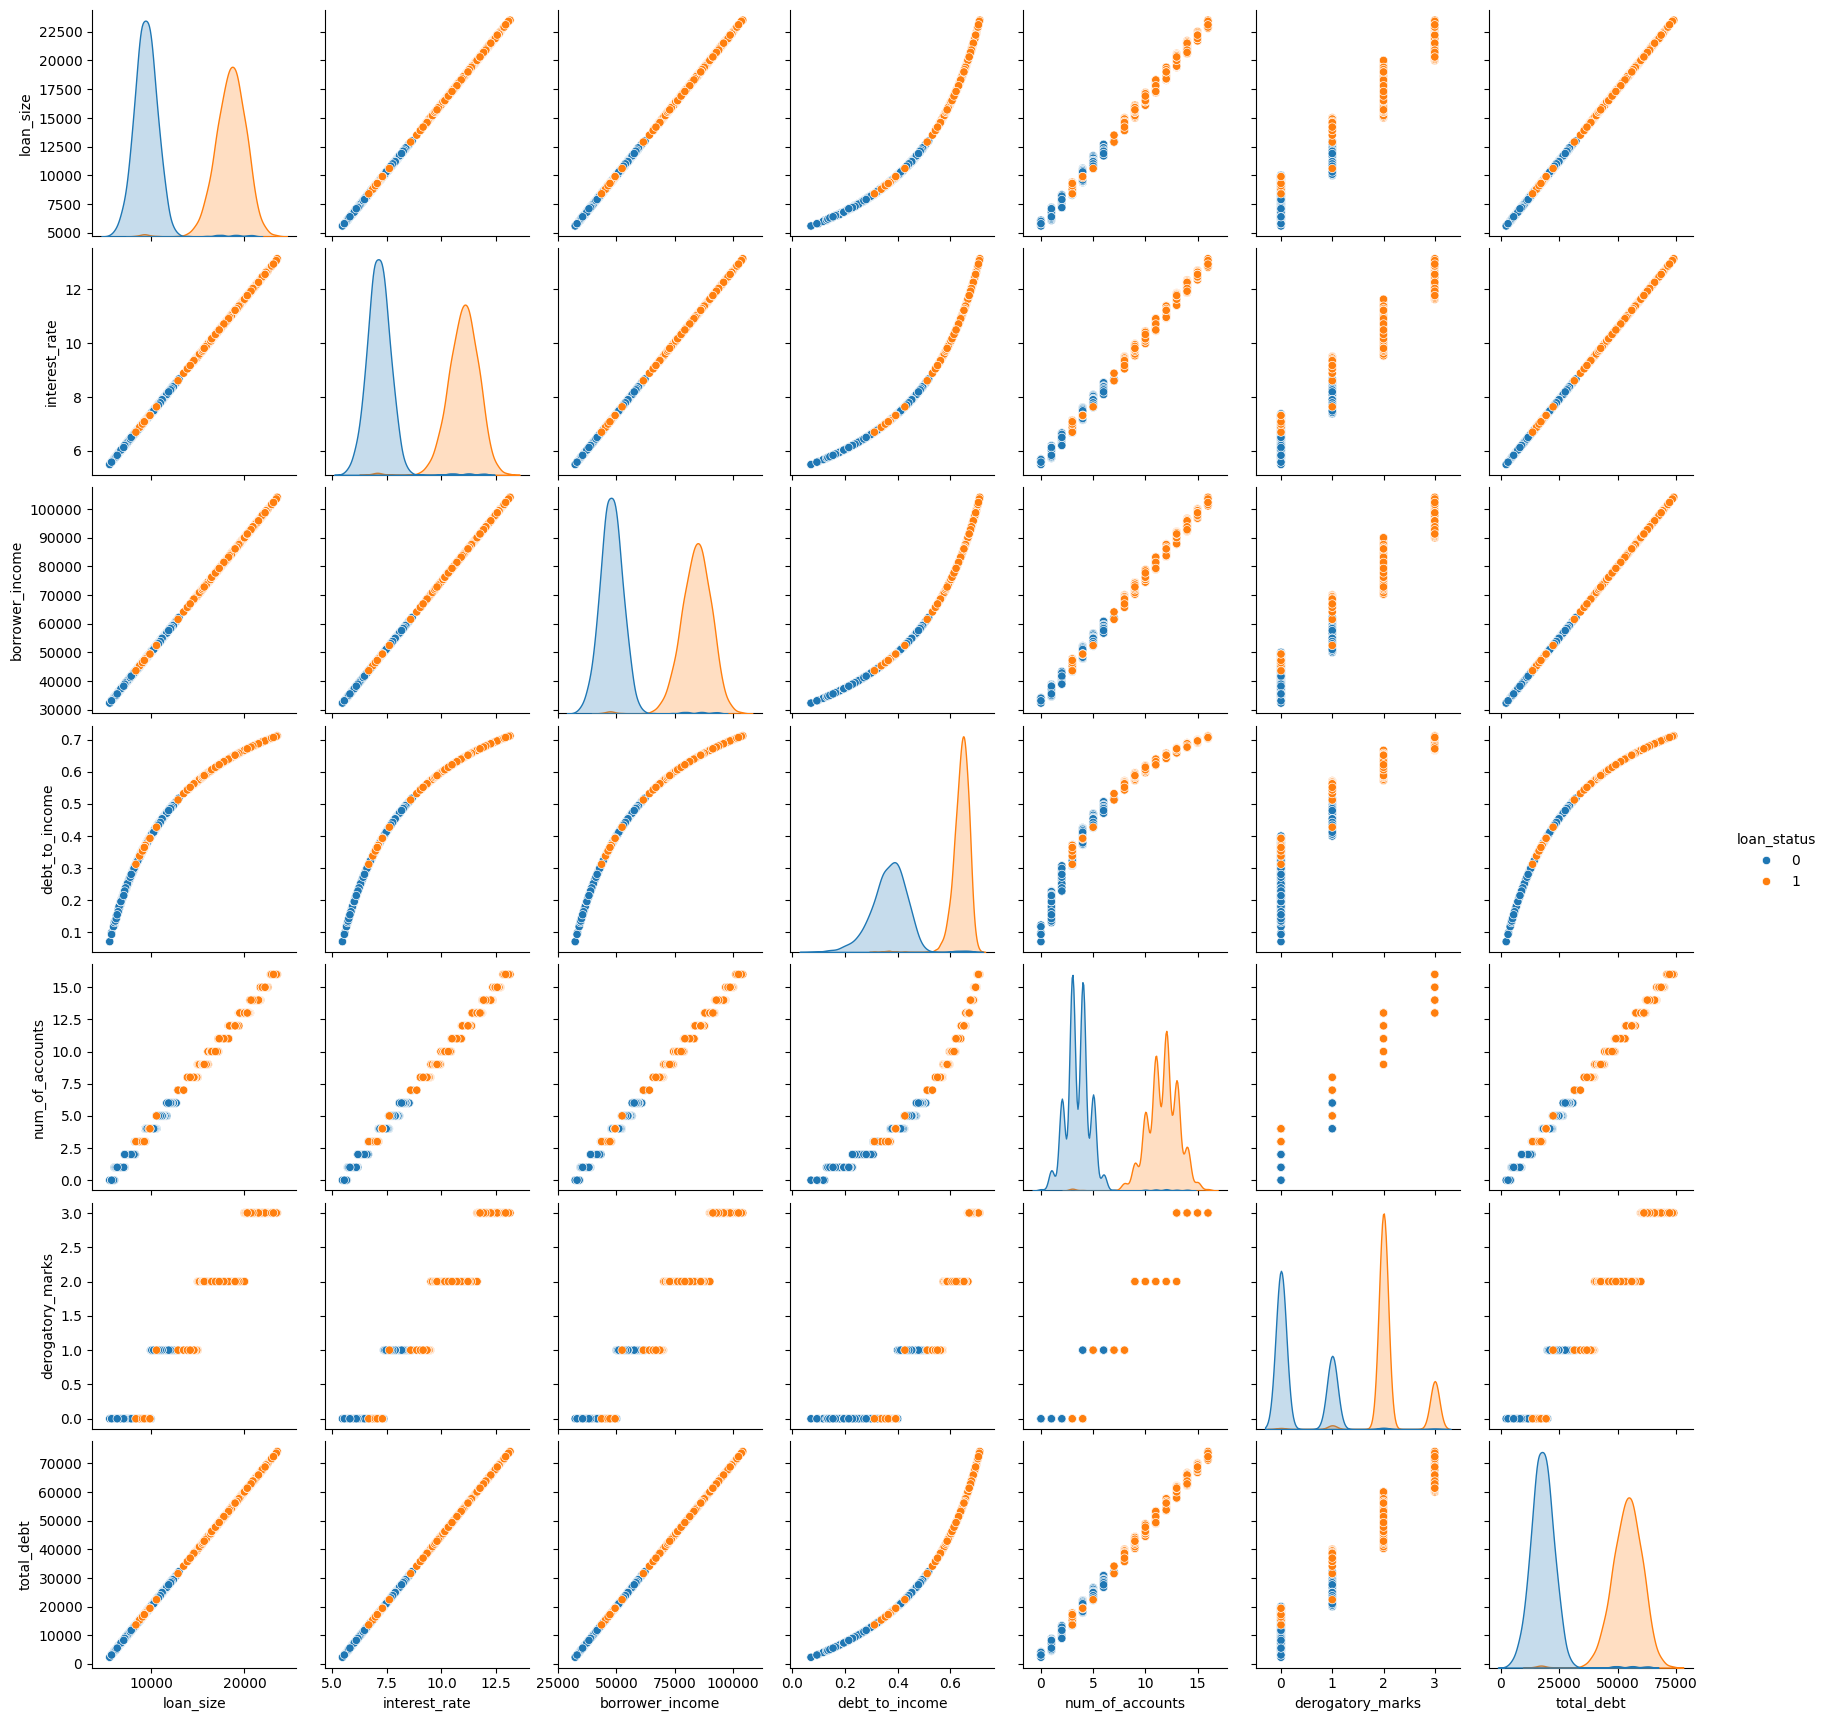

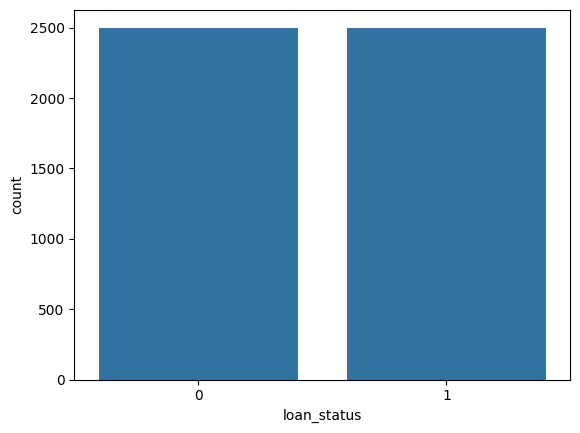

In [47]:
# Data visualization
if 'loan_status' in df_balanced.columns:
    sns.pairplot(df_balanced, hue='loan_status', diag_kind='kde')
    plt.show()
    sns.countplot(x='loan_status', data=df_balanced)
    plt.show()
else:
    print("Error: 'loan_status' column not found in the DataFrame.")